## plotting After-process data   |||  NO_ ALGORITHM 

In [1]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from matplotlib.collections import PolyCollection
from matplotlib.colors import colorConverter
import matplotlib.pyplot as plt
import pandas as pd # v. 1.7
import numpy as np
import MySQLdb
import matplotlib.pyplot as plt
import pandas as pd
import sys
import time
import datetime 
import random
import statistics 
%matplotlib inline  


"""
unit >> bill
"""

import pandas as pd
import matplotlib.pyplot as plt
import MySQLdb
import time

from sympy import *
from sympy.solvers import solve
from sympy.parsing.sympy_parser import parse_expr

# x = raw_input('What about Ft?')
# Ft = float(x)
Ft = -0.048
t1 = 3.2484      # rate_1
t2 = 4.2218      # rate_2
t3 = 4.4217      # rate_3
ser = 38.22      # service_charge
u = symbols('u')

def bill(allpow):    
    ## Fundamental parameter
    if allpow == 0:
        bath = 0
    elif 1 <= allpow <= 150:
        bath = allpow*t1
    elif  151 <= allpow <= 400:
        power = allpow-150
        bath_1 = 150*t1
        bath_2 = power*t2
        bath = bath_1+bath_2
    else:
        power = allpow-150
        bath_1 = 150*t1
        power = power-250
        bath_2 = 250*t2
        bath_3 = power*t3
        bath = bath_1+bath_2+bath_3   
    service_price = 38.22  #permonth (fixed)   
    ## FT -33.2 satang/unit
    FT_price = allpow*Ft
    ## VAT 7%
    VAT_price = ((service_price+bath)+FT_price)*0.07
    bill = bath+service_price+FT_price+VAT_price
    return round(bill,2)

#### plotting month1 : October

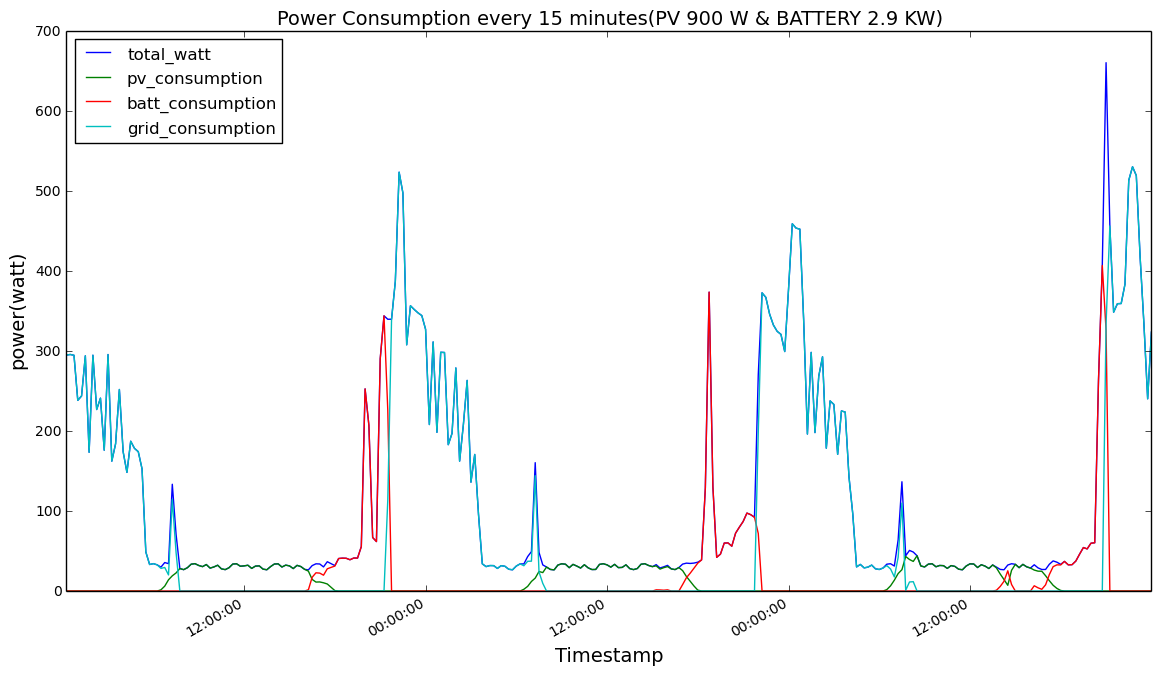

2016-10-01 00:00:00 to 2016-10-31 23:59:59
Total unit consumption || No-algorithm & PVBATT || equal to 383.111085 kW equal to 1595.63 bath
Total power consumption from PEA equal to 289.04957656 kW equal to 1175.55 bath


In [2]:
conn= MySQLdb.connect("localhost","conn","hems")
cursor = conn.cursor()

time_a = '2016-10-18 00:00:00'
time_b = '2016-10-20 23:59:59'

query= "SELECT Timestamp,total_watt,pv_consumption,batt_consumption,grid_consumption FROM thesis.noalgorithm_6month WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; " % (time_a,time_b)
df = pd.read_sql(query, conn,index_col=['Timestamp'])
fig, ax = plt.subplots(figsize=(14*1, 8))
ax.set_title('Power Consumption every 15 minutes(PV 900 W & BATTERY 2.9 KW)', fontsize=14)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('power(watt)', fontsize=14)
df.plot(ax=ax)
plt.show()

d = 31
time_a = pd.date_range('2016-10-01 00:00:00', periods=96*d, freq='15T')
time_b = pd.date_range('2016-10-01 00:14:59', periods=96*d, freq='15T')
conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()
print time_a[0],"to",time_b[-1]
query0 = "SELECT Timestamp,total_watt,grid_consumption FROM thesis.noalgorithm_6month WHERE Timestamp >= '%s' AND  Timestamp <= '%s'; "% (time_a[0],time_b[-1])
df = pd.read_sql(query0, conn)
print "Total unit consumption || No-algorithm & PVBATT || equal to",df.total_watt.sum()/1000,"kW equal to", bill(df.total_watt.sum()/1000),"bath"
print "Total power consumption from PEA equal to",df.grid_consumption.sum()/1000,"kW equal to", bill(df.grid_consumption.sum()/1000),"bath"


#### plotting month2 : November

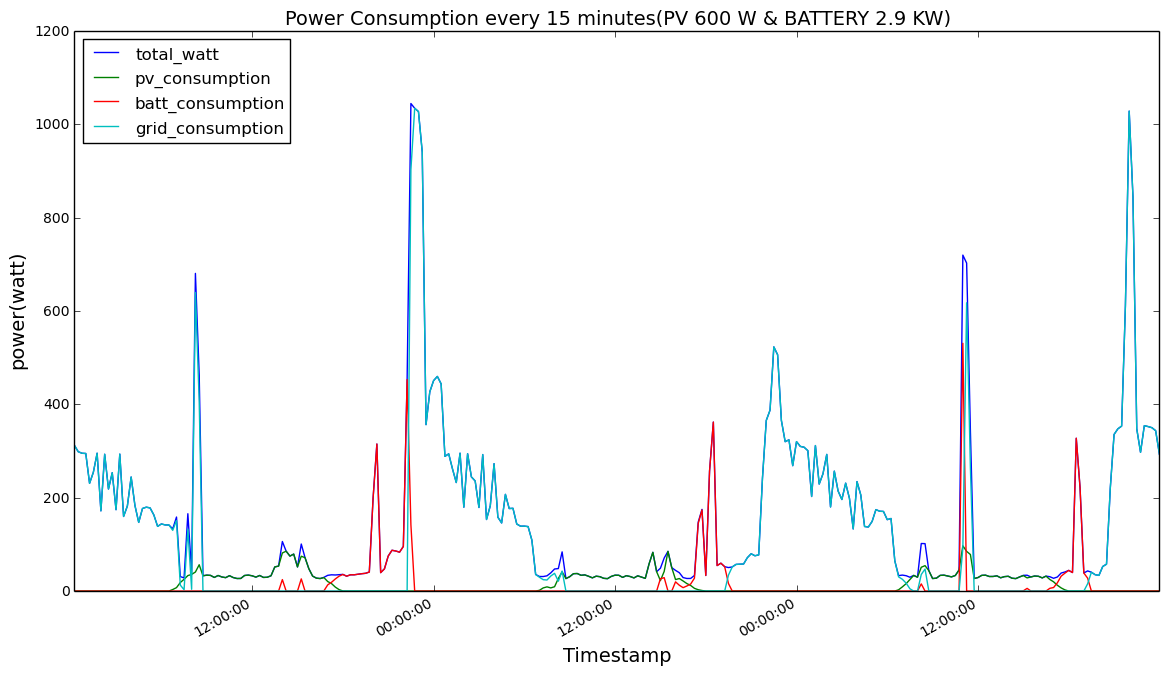

2016-11-01 00:00:00 to 2016-11-30 23:59:59
Total unit consumption || No-algorithm & PVBATT || equal to 386.4451217 kW equal to 1610.52 bath
Total power consumption from PEA equal to 296.60429771 kW equal to 1209.29 bath


In [3]:
conn= MySQLdb.connect("localhost","conn","hems")
cursor = conn.cursor()

time_a = '2016-11-18 00:00:00'
time_b = '2016-11-20 23:59:59'

query= "SELECT Timestamp,total_watt,pv_consumption,batt_consumption,grid_consumption FROM thesis.noalgorithm_6month WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; " % (time_a,time_b)
df = pd.read_sql(query, conn,index_col=['Timestamp'])
fig, ax = plt.subplots(figsize=(14*1, 8))
ax.set_title('Power Consumption every 15 minutes(PV 600 W & BATTERY 2.9 KW)', fontsize=14)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('power(watt)', fontsize=14)
df.plot(ax=ax)
plt.show()

d = 30
time_a1 = pd.date_range('2016-11-01 00:00:00', periods=96*d, freq='15T')
time_b1 = pd.date_range('2016-11-01 00:14:59', periods=96*d, freq='15T')
conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()
print time_a1[0],"to",time_b1[-1]
query0 = "SELECT Timestamp,total_watt,grid_consumption FROM thesis.noalgorithm_6month WHERE Timestamp >= '%s' AND  Timestamp <= '%s'; "% (time_a1[0],time_b1[-1])
df = pd.read_sql(query0, conn)
print "Total unit consumption || No-algorithm & PVBATT || equal to",df.total_watt.sum()/1000,"kW equal to", bill(df.total_watt.sum()/1000),"bath"
print "Total power consumption from PEA equal to",df.grid_consumption.sum()/1000,"kW equal to", bill(df.grid_consumption.sum()/1000),"bath"

#### plotting month3 : DECEMBER

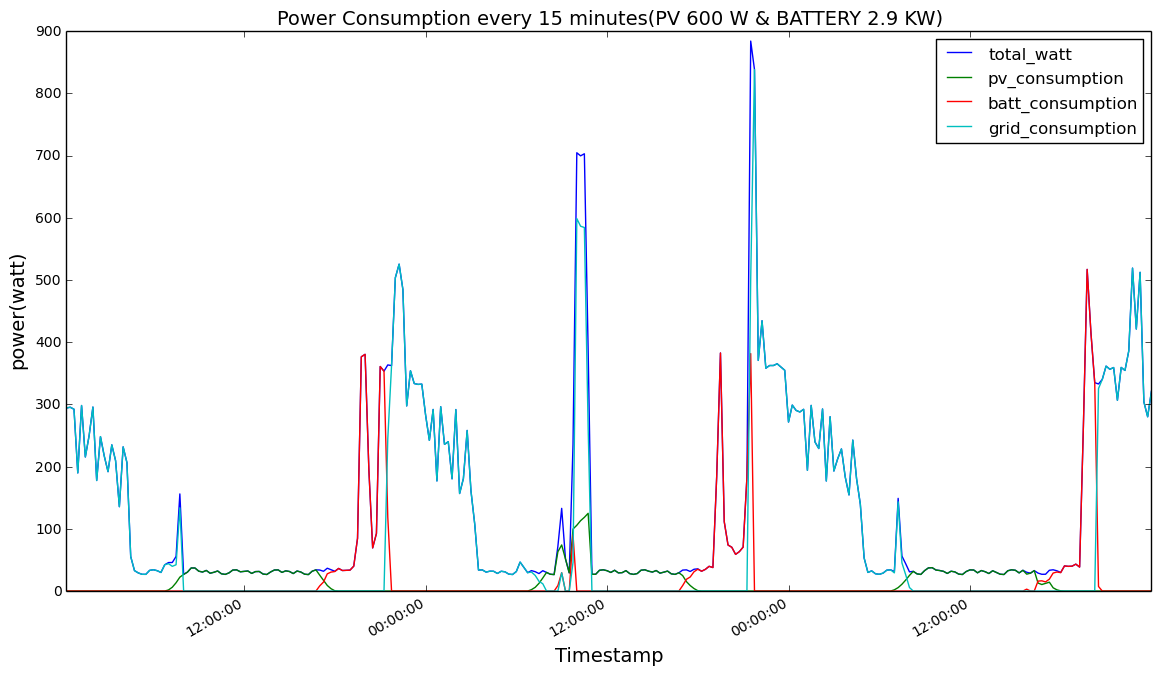

2016-12-01 00:00:00 to 2016-12-31 23:59:59
Total unit consumption || No-algorithm & PVBATT || equal to 404.8734149 kW equal to 1693.86 bath
Total power consumption from PEA equal to 311.231085256 kW equal to 1274.61 bath


In [4]:
conn= MySQLdb.connect("localhost","conn","hems")
cursor = conn.cursor()

time_a = '2016-12-18 00:00:00'
time_b = '2016-12-20 23:59:59'

query= "SELECT Timestamp,total_watt,pv_consumption,batt_consumption,grid_consumption FROM thesis.noalgorithm_6month WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; " % (time_a,time_b)
df = pd.read_sql(query, conn,index_col=['Timestamp'])
fig, ax = plt.subplots(figsize=(14*1, 8))
ax.set_title('Power Consumption every 15 minutes(PV 600 W & BATTERY 2.9 KW)', fontsize=14)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('power(watt)', fontsize=14)
df.plot(ax=ax)
plt.show()

d = 31
time_a1 = pd.date_range('2016-12-01 00:00:00', periods=96*d, freq='15T')
time_b1 = pd.date_range('2016-12-01 00:14:59', periods=96*d, freq='15T')
conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()
print time_a1[0],"to",time_b1[-1]
query0 = "SELECT Timestamp,total_watt,grid_consumption FROM thesis.noalgorithm_6month WHERE Timestamp >= '%s' AND  Timestamp <= '%s'; "% (time_a1[0],time_b1[-1])
df = pd.read_sql(query0, conn)
print "Total unit consumption || No-algorithm & PVBATT || equal to",df.total_watt.sum()/1000,"kW equal to", bill(df.total_watt.sum()/1000),"bath"
print "Total power consumption from PEA equal to",df.grid_consumption.sum()/1000,"kW equal to", bill(df.grid_consumption.sum()/1000),"bath"

#### plotting month4 : JANUARY

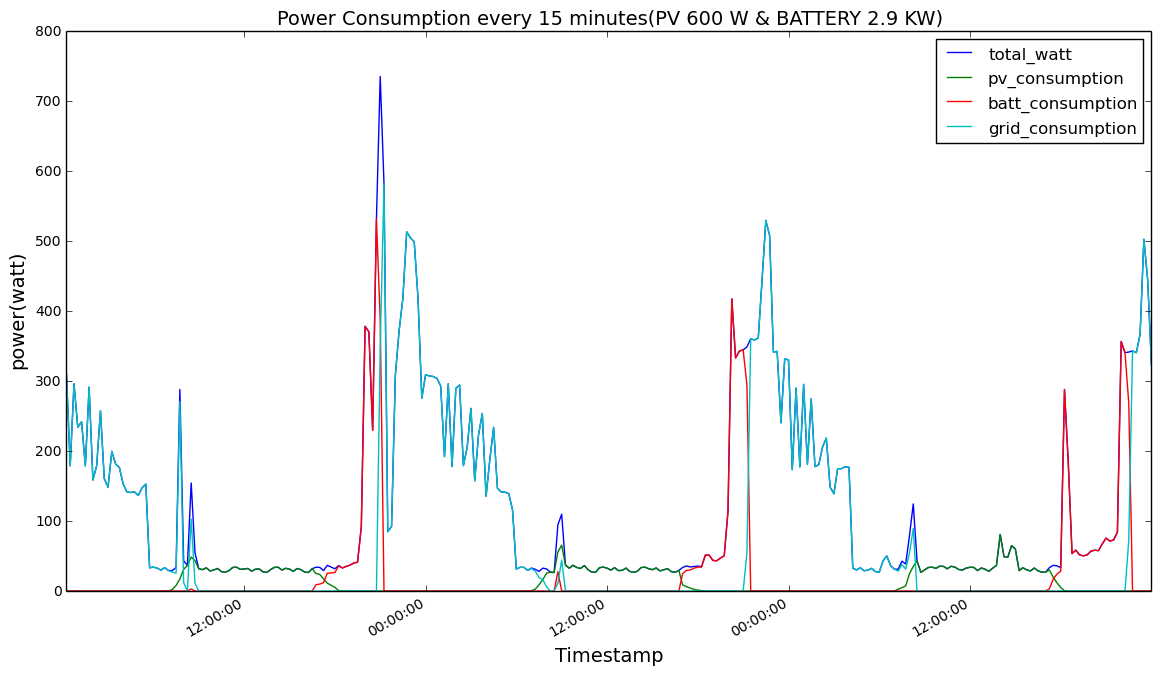

2017-01-01 00:00:00 to 2017-01-31 23:59:59
Total unit consumption || No-algorithm & PVBATT || equal to 399.8333564 kW equal to 1670.31 bath
Total power consumption from PEA equal to 310.993550667 kW equal to 1273.55 bath


In [5]:
conn= MySQLdb.connect("localhost","conn","hems")
cursor = conn.cursor()

time_a = '2017-01-18 00:00:00'
time_b = '2017-01-20 23:59:59'

query= "SELECT Timestamp,total_watt,pv_consumption,batt_consumption,grid_consumption FROM thesis.noalgorithm_6month WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; " % (time_a,time_b)
df = pd.read_sql(query, conn,index_col=['Timestamp'])
fig, ax = plt.subplots(figsize=(14*1, 8))
ax.set_title('Power Consumption every 15 minutes(PV 600 W & BATTERY 2.9 KW)', fontsize=14)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('power(watt)', fontsize=14)
df.plot(ax=ax)
plt.show()

d = 31
time_a1 = pd.date_range('2017-01-01 00:00:00', periods=96*d, freq='15T')
time_b1 = pd.date_range('2017-01-01 00:14:59', periods=96*d, freq='15T')
conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()
print time_a1[0],"to",time_b1[-1]
query0 = "SELECT Timestamp,total_watt,grid_consumption FROM thesis.noalgorithm_6month WHERE Timestamp >= '%s' AND  Timestamp <= '%s'; "% (time_a1[0],time_b1[-1])
df = pd.read_sql(query0, conn)
print "Total unit consumption || No-algorithm & PVBATT || equal to",df.total_watt.sum()/1000,"kW equal to", bill(df.total_watt.sum()/1000),"bath"
print "Total power consumption from PEA equal to",df.grid_consumption.sum()/1000,"kW equal to", bill(df.grid_consumption.sum()/1000),"bath"

#### plotting month5 : FEBRUARY

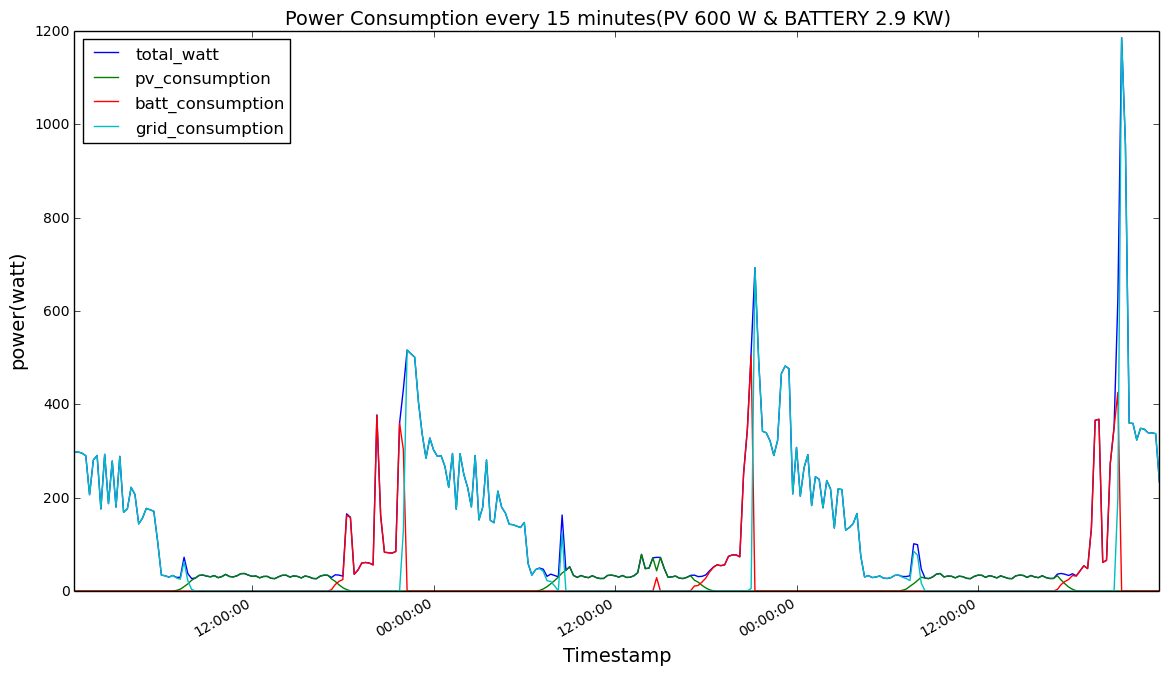

2017-02-01 00:00:00 to 2017-02-28 23:59:59
Total unit consumption || No-algorithm & PVBATT || equal to 342.6839014 kW equal to 1415.08 bath
Total power consumption from PEA equal to 252.20818015 kW equal to 1011.02 bath


In [6]:
conn= MySQLdb.connect("localhost","conn","hems")
cursor = conn.cursor()

time_a = '2017-02-18 00:00:00'
time_b = '2017-02-20 23:59:59'

query= "SELECT Timestamp,total_watt,pv_consumption,batt_consumption,grid_consumption FROM thesis.noalgorithm_6month WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; " % (time_a,time_b)
df = pd.read_sql(query, conn,index_col=['Timestamp'])
fig, ax = plt.subplots(figsize=(14*1, 8))
ax.set_title('Power Consumption every 15 minutes(PV 600 W & BATTERY 2.9 KW)', fontsize=14)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('power(watt)', fontsize=14)
df.plot(ax=ax)
plt.show()

d = 28
time_a1 = pd.date_range('2017-02-01 00:00:00', periods=96*d, freq='15T')
time_b1 = pd.date_range('2017-02-01 00:14:59', periods=96*d, freq='15T')
conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()
print time_a1[0],"to",time_b1[-1]
query0 = "SELECT Timestamp,total_watt,grid_consumption FROM thesis.noalgorithm_6month WHERE Timestamp >= '%s' AND  Timestamp <= '%s'; "% (time_a1[0],time_b1[-1])
df = pd.read_sql(query0, conn)
print "Total unit consumption || No-algorithm & PVBATT || equal to",df.total_watt.sum()/1000,"kW equal to", bill(df.total_watt.sum()/1000),"bath"
print "Total power consumption from PEA equal to",df.grid_consumption.sum()/1000,"kW equal to", bill(df.grid_consumption.sum()/1000),"bath"

#### plotting month6 : MARCH

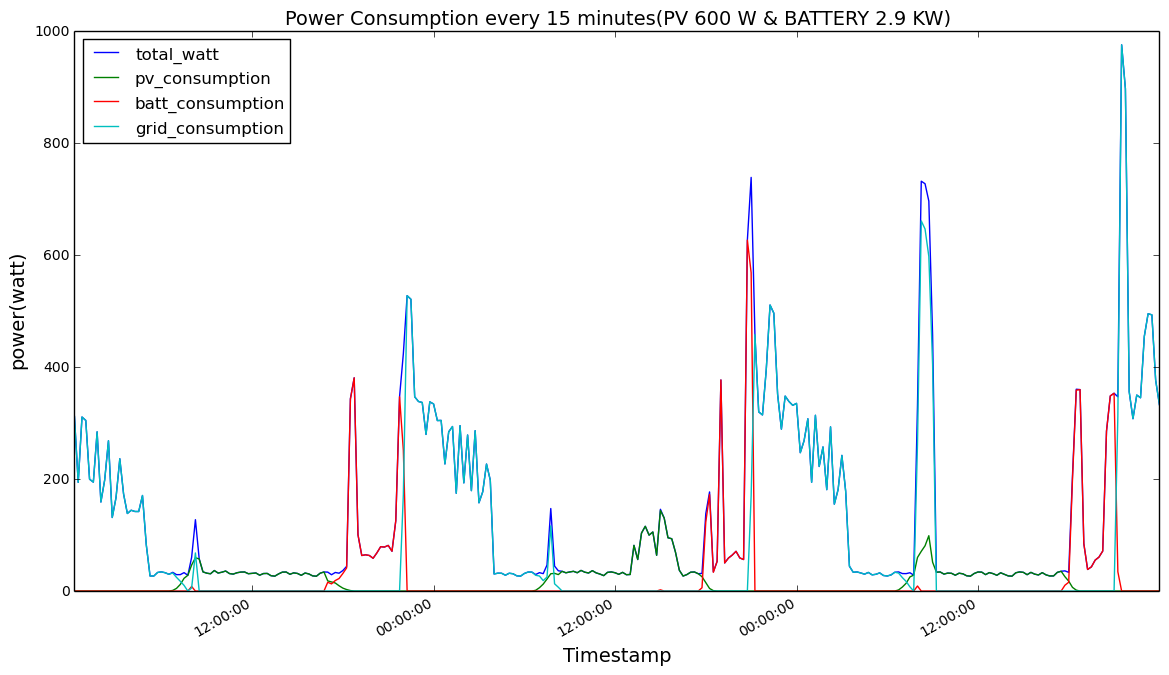

2017-03-01 00:00:00 to 2017-03-31 23:59:59
Total unit consumption || No-algorithm & PVBATT || equal to 390.4722818 kW equal to 1628.5 bath
Total power consumption from PEA equal to 284.13160167 kW equal to 1153.59 bath


In [7]:
conn= MySQLdb.connect("localhost","conn","hems")
cursor = conn.cursor()

time_a = '2017-03-18 00:00:00'
time_b = '2017-03-20 23:59:59'

query= "SELECT Timestamp,total_watt,pv_consumption,batt_consumption,grid_consumption FROM thesis.noalgorithm_6month WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; " % (time_a,time_b)
df = pd.read_sql(query, conn,index_col=['Timestamp'])
fig, ax = plt.subplots(figsize=(14*1, 8))
ax.set_title('Power Consumption every 15 minutes(PV 600 W & BATTERY 2.9 KW)', fontsize=14)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('power(watt)', fontsize=14)
df.plot(ax=ax)
plt.show()

d = 31
time_a1 = pd.date_range('2017-03-01 00:00:00', periods=96*d, freq='15T')
time_b1 = pd.date_range('2017-03-01 00:14:59', periods=96*d, freq='15T')
conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()
print time_a1[0],"to",time_b1[-1]
query0 = "SELECT Timestamp,total_watt,grid_consumption FROM thesis.noalgorithm_6month WHERE Timestamp >= '%s' AND  Timestamp <= '%s'; "% (time_a1[0],time_b1[-1])
df = pd.read_sql(query0, conn)
print "Total unit consumption || No-algorithm & PVBATT || equal to",df.total_watt.sum()/1000,"kW equal to", bill(df.total_watt.sum()/1000),"bath"
print "Total power consumption from PEA equal to",df.grid_consumption.sum()/1000,"kW equal to", bill(df.grid_consumption.sum()/1000),"bath"